In [13]:
#OLD  https://github.com/whimian/SVM-Image-Classification
# https://stackabuse.com/implementing-svm-and-kernel-svm-with-pythons-scikit-learn/
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from sklearn.model_selection import GridSearchCV, train_test_split 
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix 
from sklearn.metrics import roc_curve, auc, roc_auc_score, accuracy_score
from sklearn.model_selection import cross_val_score

# Loading .csv file
#df = pd.read_csv ('/Users/jonasvejlgardkristensen/Documents/Datasets/FeatureData/features_example.csv')

SVM classifier initiated
[UPDATE] Data has been loaded successfully!
[UPDATE] GridSearch initiated....
[UPDATE] Training model....
[UPDATE] Best hyperparameters found in gridsearch:  {'C': 0.1, 'kernel': 'linear'}
Printing Results
------------------ Confusion Matrix -------------------
[[192   3]
 [  3 202]]
 
-------------- Cross-validated accuracy ---------------


/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


[0.975  0.9875 0.9875 0.99   0.9875]
Accuracy: 0.99 (+/- 0.01)
 
---------------- Classification report ----------------
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       195
           1       0.99      0.99      0.99       205

   micro avg       0.98      0.98      0.98       400
   macro avg       0.98      0.98      0.98       400
weighted avg       0.98      0.98      0.98       400

 
--------------------- AUC score -----------------------
0.9849906191369607


No handles with labels found to put in legend.


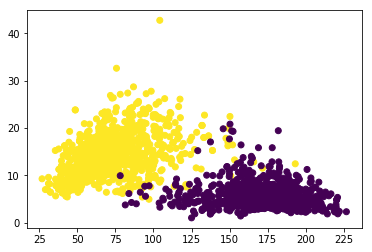

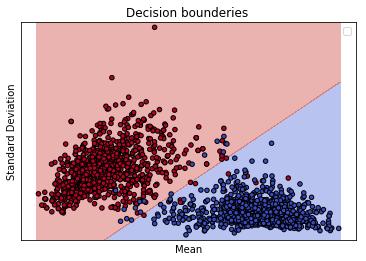

In [21]:
#Expected format: svmClassification([Dataframe = feature1, feature2, label], [getResult='yes' or 'no'], [getPlot='yes' or 'no'], [testSize = 0:1] )
svmClassification(df, getResult = 'yes', getPlot ='yes', testSize = 0.2)

In [20]:
def svmClassification(df, getResult, getPlot, testSize): 
    print('[UPDATE] SVM classifier initiated')
    # Plot of data
    # plt.scatter(df.Mean, df.StDev, c=df.label)
    
    
    # Assigning data
    X = df.drop('label', axis=1)  
    y = df['label'] 
    
    
    # Splitting the dataset.
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = testSize, random_state=10) 
    
    print('[UPDATE] Data has been loaded successfully!')
    
    # Defining the grid (Parameters that we wish to investigate)
    param_grid = [
        {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000], 'gamma': [0.001, 0.0001], 'kernel': ['rbf']},
        {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000], 'gamma': [0.001, 0.0001], 'kernel': ['poly']},
        {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000], 'gamma': [0.001, 0.0001], 'kernel': ['sigmoid']},
        {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000], 'kernel': ['linear']},
    ]
    # Calling the Support Vector Classifier function
    svc = svm.SVC()
    
    # Discovering the optimum in the parameter grid
    print('[UPDATE] GridSearch initiated....')
    svclassifier = GridSearchCV(svc, param_grid, cv = 3)
    
    # Training the model using the discovered SVC function with the discovered parameters
    print('[UPDATE] Training model....')
    svclassifier.fit(X_train, y_train)
    
    print('[UPDATE] Best hyperparameters found in gridsearch: ', svclassifier.best_params_)
    #print("GridSearchCV Results: ",svclassifier.cv_results_)
    
    
    # Making prediction
    y_pred = svclassifier.predict(X_test)
    
    
    
    if getResult == 'yes': # Plot results 
        print('[UPDATE] Printing Results')
        print('------------------ Confusion Matrix -------------------')
        print(confusion_matrix(y_test,y_pred))
        print(' ')
        print('-------------- Cross-validated accuracy ---------------')
        # !!! COMMENT CROSS_VAL_SCORE FOR FASTER COMPUTATION !!!
        scores = cross_val_score(svclassifier, X, y, cv=5)
        print(scores)
        print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
        print(' ')
        print('---------------- Classification report ----------------')
        print(classification_report(y_test,y_pred))
        print(' ')
        print('--------------------- AUC score -----------------------')
        print(roc_auc_score(y_test, y_pred))
    elif getResult == 'no':
        print('[UPDATE] Results not requested')
    else:
        print('[UPDATE] !!!THE REQUEST FOR RESULTS WAS INVALID!!!!')
    
    if getPlot == 'yes':
        print('[UPDATE] Plotting decision bounderies....')
        # Plot Decision bounderies https://stackoverflow.com/questions/51297423/plot-scikit-learn-sklearn-svm-decision-boundary-surface
        def make_meshgrid(x, y, h=.02):
            x_min, x_max = x.min() - 1, x.max() + 1
            y_min, y_max = y.min() - 1, y.max() + 1
            xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
            return xx, yy
        
        def plot_contours(ax, svclassifier, xx, yy, **params):
            Z = svclassifier.predict(np.c_[xx.ravel(), yy.ravel()])
            Z = Z.reshape(xx.shape)
            out = ax.contourf(xx, yy, Z, **params)
            return out
        
        fig, ax = plt.subplots()
        # title for the plots
        title = ('Decision bounderies ')
        # Set-up grid for plotting.
        X0, X1 = X.values[:, 0], X.values[:, 1]
        xx, yy = make_meshgrid(X0, X1)
        
        plot_contours(ax, svclassifier, xx, yy, cmap=plt.cm.coolwarm, alpha=0.4)
        ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
        ax.set_ylabel('Standard Deviation')
        ax.set_xlabel('Mean')
        ax.set_xticks(())
        ax.set_yticks(())
        ax.set_title(title)
        ax.legend()
        plt.show()
    elif getResult == 'no':
        print('[UPDATE] Plot not requested')
    else:
        print('[UPDATE] !!!THE REQUEST FOR PLOTS WAS INVALID!!!!')